# Problemas para llevar
## Problema 1

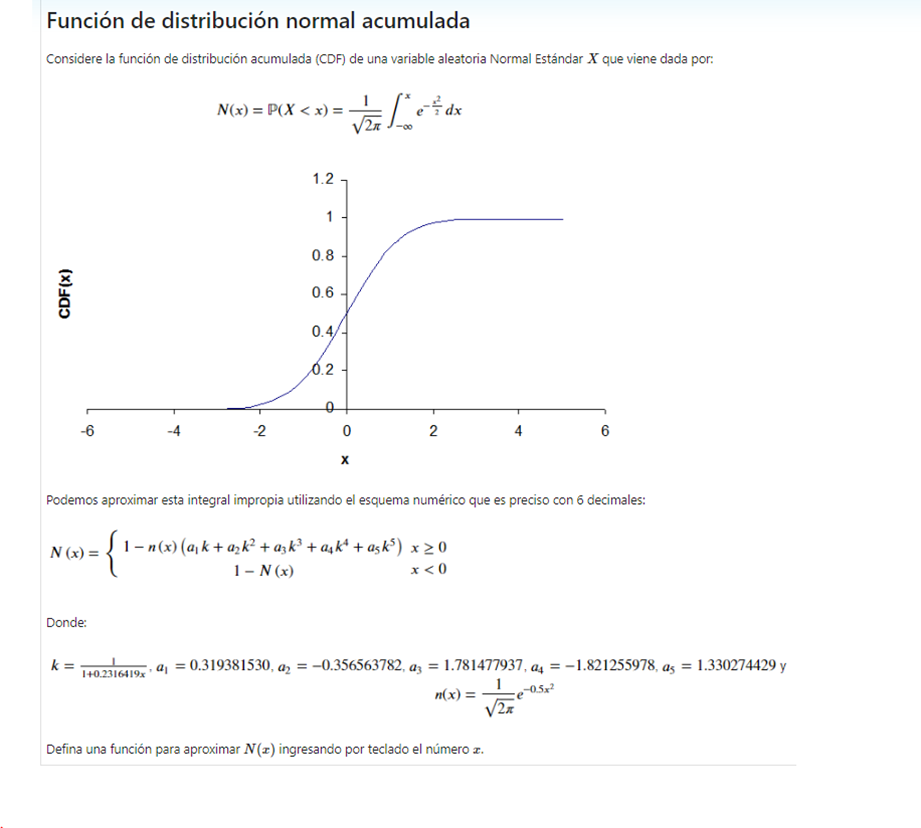

Se comienza por analizar la fórmula dada. Esta función se compone de un polinomio de grado 5 y una función auxiliar nombrada $n$. Comenzaremos programando la función auxiliar $n$.  

In [1]:
#Importamos math
import math

#Definimos la función, para tratar de mantener las partes separadas. 
def n(x):
    #retornamos el valor que se desea ingresar
    return math.e**(-0.5*x**2)/math.sqrt(2*math.pi)

Se valida que la función anterior esté funcionando correctamente. 

In [2]:
#Valores para probar, -1, 0 y 1.
print("n(-1): ",n(-1))
print("n(0): ",n(0))
print("n(1)",n(1))

n(-1):  0.24197072451914337
n(0):  0.3989422804014327
n(1) 0.24197072451914337


Se observa que los valores anteriores son correctos al compararlos con valores arrojados por WolframAlpha. Además cumple propiedad de simetría, i.e. positivos y negativos arrojan el mismo valor. 
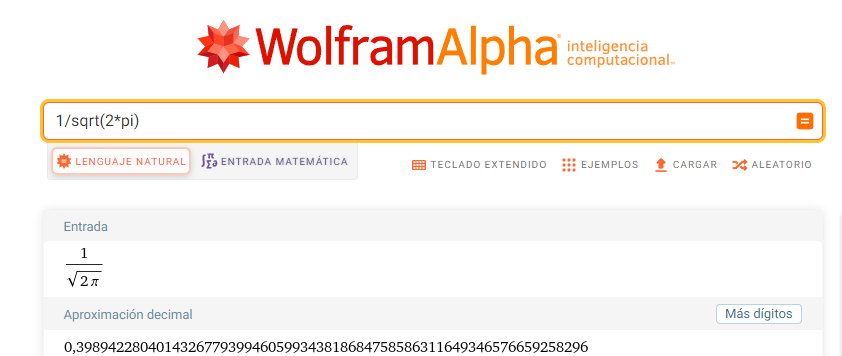
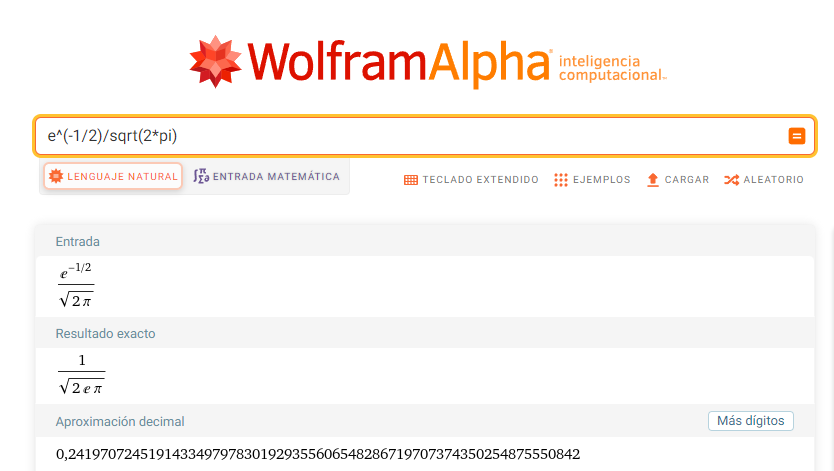

Para finalizar se define la función $N$ en general para cualquier valor. (Nota) se observó problemas al evaluar la función par $x$ negativo. Se marca el código agregado post validación. 

In [3]:
def N(x):
    #Post validación se observó que se debe convertir x a -x si es negativo
    if x<0:
        x=-x
    #Le informamos al programa que se ingresó un número negativo 
        isNeg=True
    else:
        isNeg=False
    
    #Por cuestiones de espacio vamos a ir definiendo cada parte del polinomio 
    #por separado
    a1=0.319381530
    a2=-0.356563782
    a3=1.781477937
    a4=-1.821255978
    a5=1.330274429
    k=1/(1+0.2316419*x)
    n_x=n(x)
    #con las constantes ingresadas, procedemos a retornar el polinomio.
    pol=n_x*(a1*k+a2*k**2+a3*k**3+a4*k**4+a5*k**5)
    #Si no negativo
    if isNeg:
        return pol
    else:
        return 1-pol

### Validación

Para validar el resultado de la función anterior, se van a comparar con valores importantes de la función CDF(x). 
 - Para el percentil 90 se tiene el valor de 1.282. Mientras que para el percentil 10, -1.282.
 - Para el percentil 95, el valor de 1.645 y para el 5, -1.645.
 - Para el 97.5, el valor de 1.96 y para el 2.5, -1.96. 
 - Para el 99, el valor de 2.326 y para el 1, -2.326.
 - Finalmente para el percentil 99.9, el valor de 3.0902 y para el 0.1, -3.0902.

In [4]:
#Valuamos en todos los parámetros
#Definimos vector de percentiles a evaluar
Perc=[1.282,1.645,1.96,2.326,3.0902]

#Valuamos en los percentiles
for p in Perc:
    print(f"Z score of {p}, percentile: {N(p)}.")
    print(f"Z score of {-p}, percentile: {N(-p)}.")

Z score of 1.282, percentile: 0.9000786114119994.
Z score of -1.282, percentile: 0.09992138858800059.
Z score of 1.645, percentile: 0.9500151101588823.
Z score of -1.645, percentile: 0.04998488984111776.
Z score of 1.96, percentile: 0.9750021748433644.
Z score of -1.96, percentile: 0.024997825156635615.
Z score of 2.326, percentile: 0.9899907480402824.
Z score of -2.326, percentile: 0.01000925195971763.
Z score of 3.0902, percentile: 0.9989998229470667.
Z score of -3.0902, percentile: 0.0010001770529333182.


Para finalizar, se agrega la opción que el usuario ingrese el valor que desea calcular

In [5]:
#calculador de CDF
def CDF():
    print("Estimado usuario, ingrese el valor de CDF que desa calcular.")
    x=float(input())
    print(f"CDF de {x} es: {N(x)}")

### Conclusión

La función que calcula el CDF funciona como se desea, retorna valores deseados y su rango va de 0 a 1. Se da por finalizado este problema.

## Problema 2

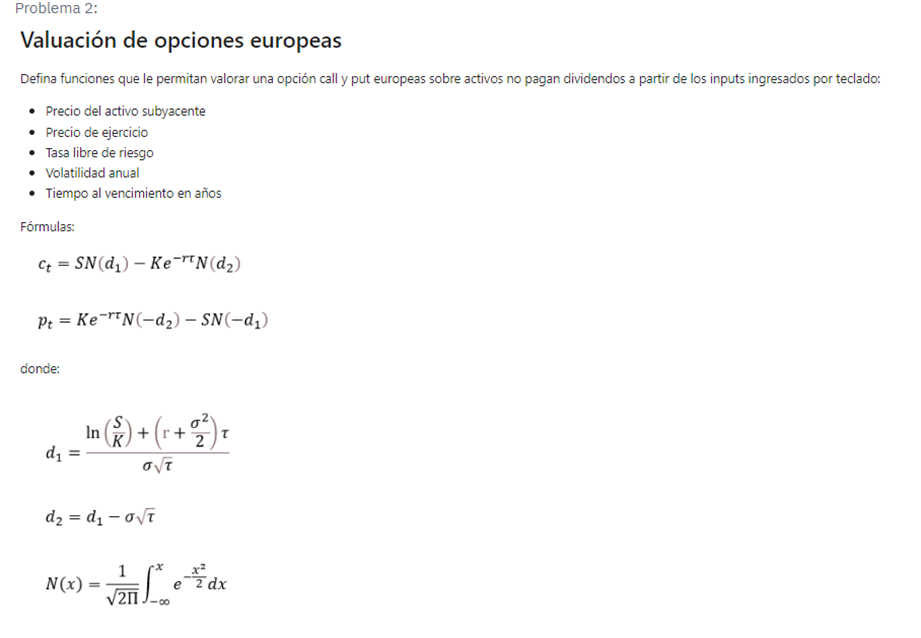

Primero se identifican los inputs y outputs de la valuación de las opciones. Los inputs no están definidos, se asumen de conocimientos previos. Primero la volatilidad anual usualmente es una medida de riesgo. El riesgo comunmente se relaciona con la desviación estandar $\sigma$. Lo siguiente es la medida de tiempo, esta se puede relacionar con la variable $\tau$.

La tasa libre de riesgo, se relaciona con la variable que lleva su inicial $r$. Finalmente falta identificar quiénes se identifican con las variables $K$ y $S$. 
 
Revisando los conceptos, si los inversionistas tienen altas expectativas de una opción, entonces el volumen de opciones call aumenta (esto sucede cuando cuando el precio de ejercicio va en la alza). Mientras que lo contrario es cierto si se tienen expectativas a la baja. 

Además, por simetría de la función normal estándar: 
$$c_t-p_t=2*SN(d_1)-K*e^{-r*\tau}-1$$
Si el volumen de las opciones call es mayor que el de las puts entonces $S*N(d_1)$ debe ser mayor. Esto sucede cuando el precio del ejercicio va en la alza. Dado que $N(x)$ es una función monótonamente creciente, si $d_1$ aumenta, también lo hace $N(d_1)$. Pero para que esto suceda, la variable $S$ debe ir a la alza. De esto identificamos que $S$ es el precio del activo subyacente y $K$ el precio del ejercicio. Posteriormente se harán validaciones para comprobar si esta hipótesis planteada es correcta. 


(Nota) Nuestras hipótesis anteriores eran correctas, de hecho tras búsqueda en google se encontró la siguiente fórmula: 
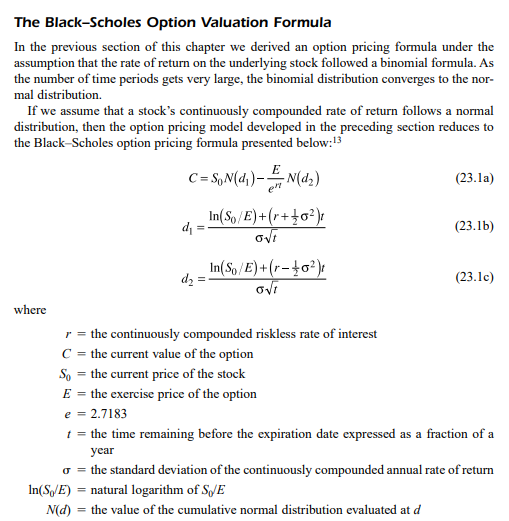

En base a lo anterior se plantea el problema. 
- Inputs:
     - Precio del activo subyacente: $S$.
     - Precio del ejercicio: $K$.
     - Tasa libre de riesgo: $r$.
     - Volatilidad anual: $\sigma$. 
     - Tiempo al vencimiento en años: $\tau$.
     
     
 - Outpus:
     - Call para tiempo t: $c_t$.
     - Puts para el tiempo t: $p_t$.

Se procede a definir cada una de las funciones, comenzando con el cálculo de $d_1$.

In [6]:
def d1(S,K,r,sigma,t):
    #Retornamos tras el cálculo
    return (math.log(S/K)+(r+(sigma**2)/2)*t)/(sigma*math.sqrt(t))

Se valida la función anterior:

In [7]:
d1(1.5,6,0.8,0.5,4)

2.3137056388801094

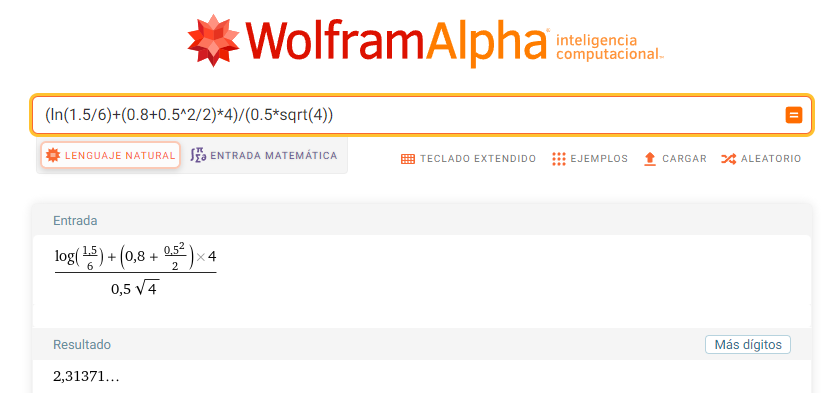

Se define $d_2$.

In [8]:
def d2(d_1,sigma,t):
    #Retornamos el cálculo
    return d_1-sigma*math.sqrt(t)

Se define $c_t$.

In [9]:
def ct(S,K,r,sigma,t):
    #La variable S y K deben tener el mismo signo y ser positivas.
    #No validamos S y K ya que de existir un error en los imputs, python mostrará un error.
    #Por el contrario, validamos que tanto r, sig sean menores que 1 y mayores o iguales que 0. 
    #También valuamos que t sea no positivo.
    if sigma>=0 and sigma<=1 and r>=0 and r<=1 and t>0:
        #Por simplicidad calculamos primero d1 y d2
        d_1=d1(S,K,r,sigma,t)
        d_2=d2(d_1,sigma,t)
        return S*N(d_1)-K*math.e**(-r*t)*N(d_2)    
    #De lo contrario informamos que hay error
    else:
        print("Uno de los valores ingresaods no es correcto")

Se harán las validaciones hasta el final. 

Se define $p_t$.

In [10]:
def pt(S,K,r,sigma,t):
    #Igual que antes, dado que puedo solicitar pt independiente que ct debo realizar validaciones. 
    if sigma>=0 and sigma<=1 and r>=0 and r<=1 and t>0:
        #Por simplicidad calculamos primero d1 y d2
        d_1=d1(S,K,r,sigma,t)
        d_2=d2(d_1,sigma,t)
        return K*math.e**(-r*t)*N(-d_2)-S*N(-d_1)      
    #De lo contrario informamos que hay error
    else:
        print("Uno de los valores ingresaods no es correcto")

### Validación

La bibliografía anterior proporciona dos ejemplos concretos que permiten validar nuestras fórmulas
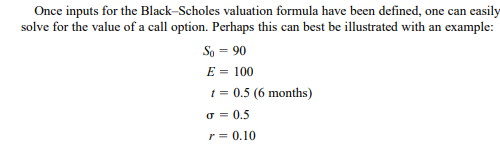
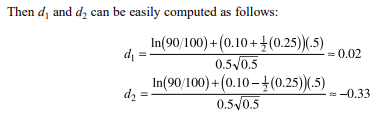
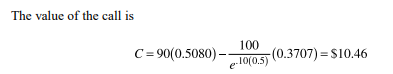

In [11]:
#Validamos d1 y d2
d_1=d1(90,100,0.10,0.5,0.5)
print(f"El valor de d1 es de: {d_1}")
print(f"El valor de d1 es de: {d2(d_1,0.5,0.5)}")

El valor de d1 es de: 0.02019351117010486
El valor de d1 es de: -0.3333598794231689


In [12]:
#Validamos ct 
print(f"El valor de la opción call es de: ${round(ct(90,100,0.10,0.5,0.5),2)}")
print(f"El valor de la opción put es de: ${round(pt(90,100,0.10,0.5,0.5),2)}")

El valor de la opción call es de: $10.58
El valor de la opción put es de: $15.71


### Conclusión

Los tres valores encontrados son suficientemente cercanos. Además, se observa que las diferencias encontradas se deben a aproximaciones por lo que se da por concluido este problema. 

### Bibliografía

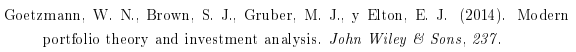